# 데이터 정제 실전 연습

## Data 불러오기

In [8]:
%config Completer.use_jedi = False #자동완성끄기

In [1]:
import pandas as pd
data=pd.read_csv("house_raw.csv")
data.head()

,housing_age,income,bedrooms,households,rooms,house_value
0,23,6.7770,0.141112,2.442244,8.103960,500000
1,49,6.0199,0.160984,2.726688,5.752412,500000
2,35,5.1155,0.249061,1.902676,3.888078,500000
3,32,4.7109,0.231383,1.913669,4.508393,500000
4,21,4.5625,0.255583,3.092664,4.667954,500000


## Data 확인하기

### describe 확인

In [2]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
housing_age,17914.0,27.307022,11.297204,1.000000,18.000000,28.000000,36.000000,51.000000
income,17914.0,3.664086,1.526694,0.499900,2.526125,3.447800,4.583300,9.905500
bedrooms,17914.0,0.214309,0.055251,0.100000,0.177544,0.204256,0.240476,1.000000
households,17914.0,3.007667,4.579534,0.692308,2.467031,2.853499,3.318866,599.714286
rooms,17914.0,5.370672,2.332776,0.846154,4.426115,5.199222,5.970848,132.533333
house_value,17914.0,188692.620130,95318.621139,14999.000000,114325.000000,170800.000000,242100.000000,500000.000000


### histgram

array([[<AxesSubplot:title={'center':'housing_age'}>,
        <AxesSubplot:title={'center':'income'}>],
       [<AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'households'}>],
       [<AxesSubplot:title={'center':'rooms'}>,
        <AxesSubplot:title={'center':'house_value'}>]], dtype=object)

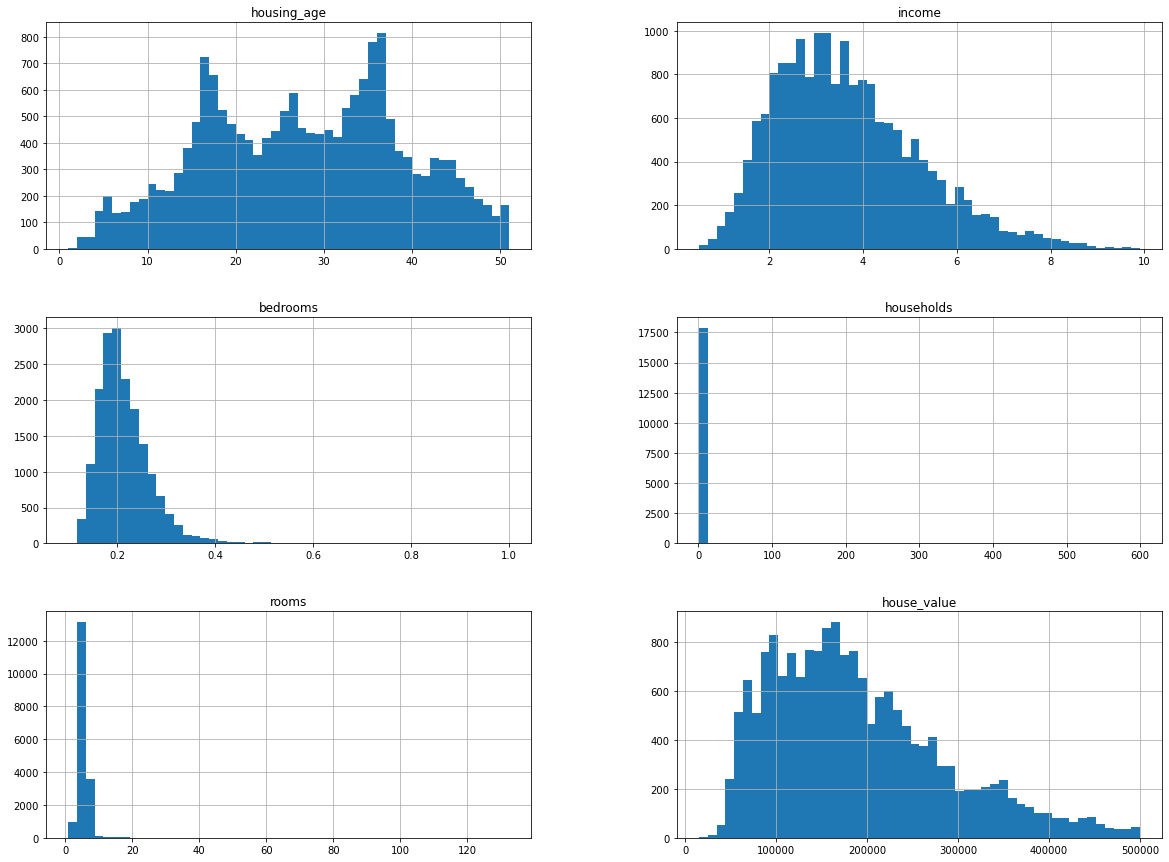

In [3]:
data.hist(bins=50, figsize=(20,15)) # figsize는 Tuple로 입력

## (정제 전) Data로 선형회귀 분석하기

### Data set 분류하기
- sklearn의 sklearn.model_selection의 train_test_split import 

In [4]:
X=data[data.columns[0:5]] # 설명변수 분리 (0~4열)
y=data[["house_value"]] # 종속변수 분리

### sklearn 활용하여 train/ test set 분리

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y,random_state=42)

### Data 정규화 (Min-Max Scaler)
- 변수 크기에 따른 영향 제거

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler_minmax=MinMaxScaler() # MinMaxScaler 클래스 선언
scaler_minmax.fit(X_train)
X_scaled_minmax_train=scaler_minmax.transform(X_train)
X_scaled_minmax_test=scaler_minmax.transform(X_test)

### minmax 결과 확인

In [38]:
pd.DataFrame(X_scaled_minmax_train)

,0,1,2,3,4
0,0.70,0.293389,0.130712,0.053361,0.024402
1,0.60,0.391554,0.077647,0.051154,0.038496
2,0.92,0.343891,0.072778,0.045008,0.040801
3,0.58,0.199094,0.138223,0.051153,0.030048
4,0.44,0.226344,0.119503,0.038037,0.042341
...,...,...,...,...,...
13430,0.74,0.179255,0.134035,0.079778,0.027535
13431,0.98,0.196766,0.107037,0.044678,0.030620
13432,0.38,0.550640,0.058533,0.058827,0.042184
13433,0.34,0.379423,0.178514,0.028381,0.019646


### sklearn의 선형회귀모델 불러오기

In [10]:
from sklearn.linear_model import LinearRegression
model=LinearRegression() # 선형회귀 모델 클래스 선언하기
model.fit(X_scaled_minmax_train,y_train) # 모델에 Train set 입력 (fit)


LinearRegression()

### R-square 확인 (train set)

In [11]:
pred_train=model.predict(X_scaled_minmax_train)
model.score(X_scaled_minmax_train,y_train)


0.5463729131516732

### R-sqaure 확인 (test set)

In [13]:
pred_test=model.predict(X_scaled_minmax_test)
model.score(X_scaled_minmax_test,y_test)

-2.8220648010161558

## 이상치 제거 실시

### bedrooms 변수 확인

<AxesSubplot:>

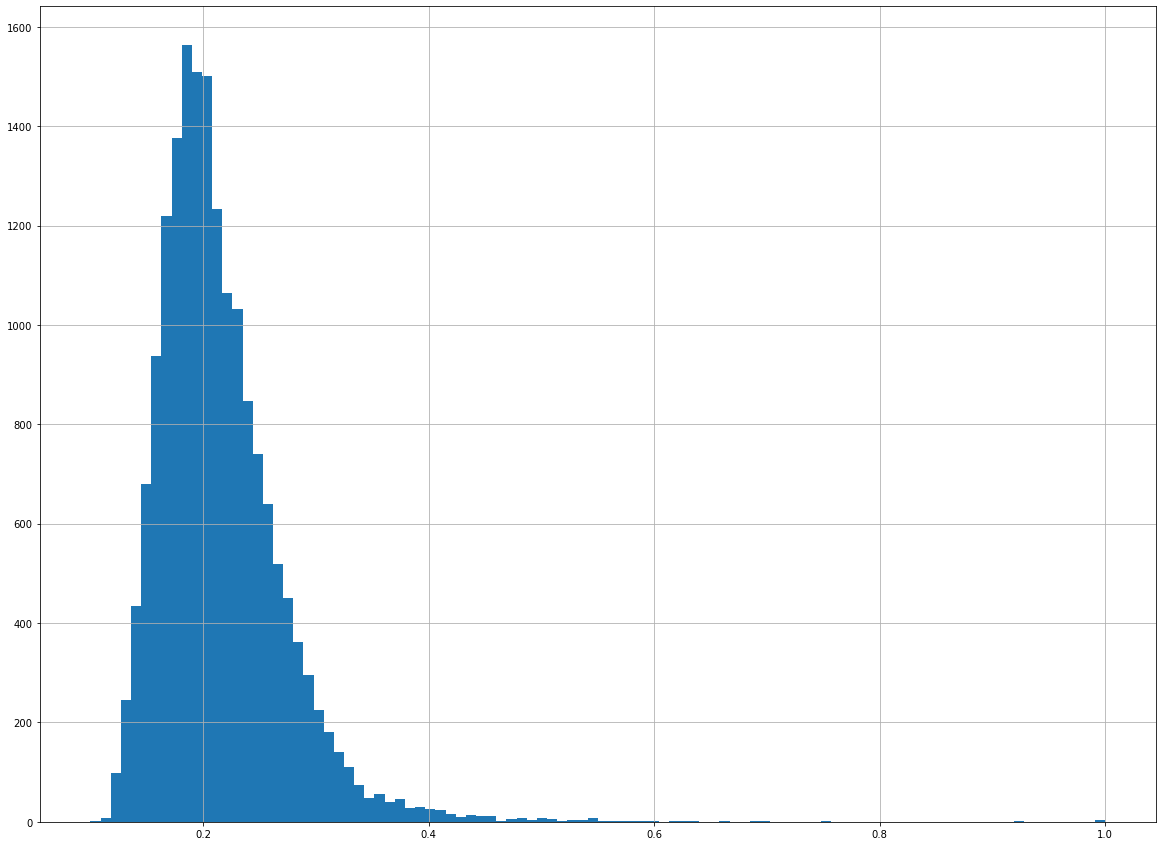

In [16]:
data['bedrooms'].hist(bins=100, figsize=(20,15))

#### 이상치 제거후 histgram 확인

<AxesSubplot:>

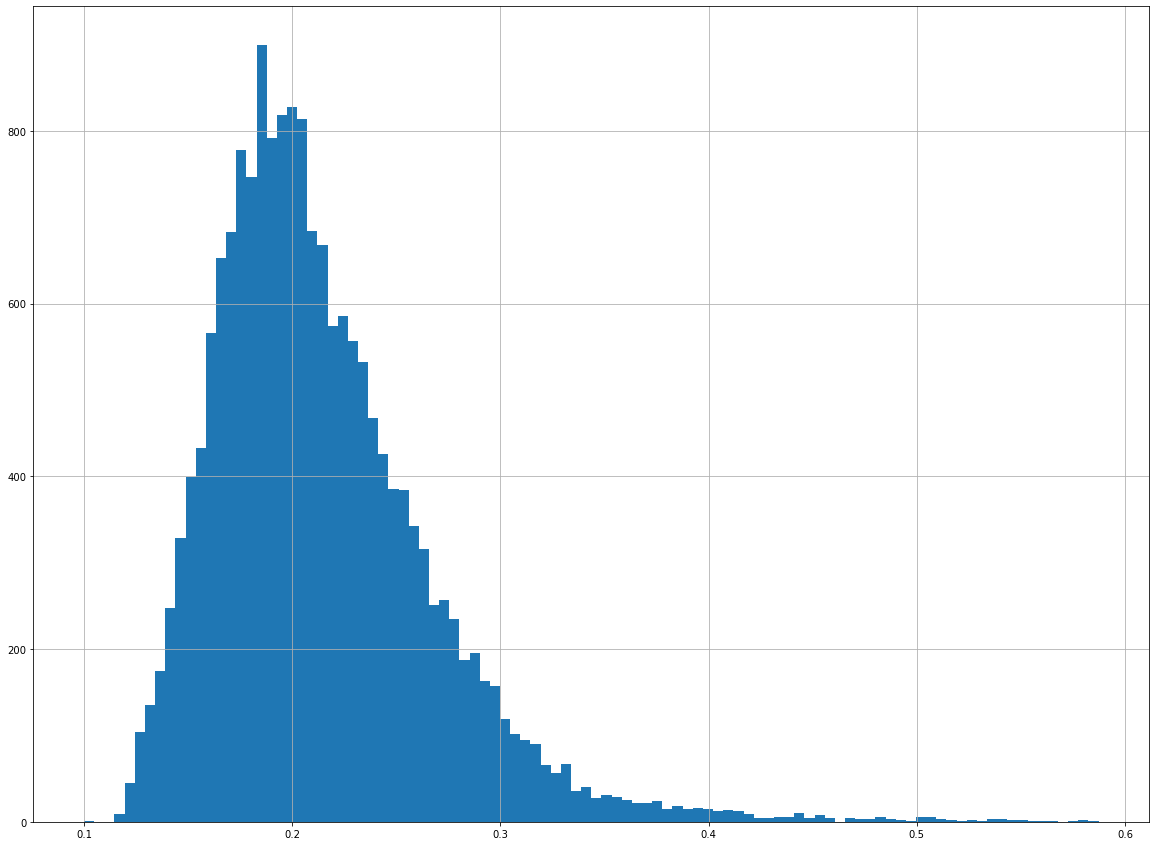

In [15]:
data_bedroom=data[data['bedrooms']<0.6]
data_bedroom['bedrooms'].hist(bins=100, figsize=(20,15))

#### 이상치 집계

In [18]:
data_bedroom2=data[data['bedrooms']>=0.6]
print(data_bedroom2['bedrooms'].value_counts())
data_bedroom2

1.000000    3
0.635258    1
0.602489    1
0.658869    1
0.700000    1
0.686114    1
0.923077    1
0.662539    1
0.627338    1
0.750000    1
0.613084    1
0.625887    1
Name: bedrooms, dtype: int64


,housing_age,income,bedrooms,households,rooms,house_value
1732,43,1.3157,0.602489,2.133660,1.911826,333300
1911,25,1.7866,0.635258,3.566327,1.678571,325000
3162,26,1.4904,0.658869,3.750779,1.598131,275000
3165,12,1.2012,0.613084,3.271233,1.465753,275000
5446,24,1.8304,0.662539,3.973545,1.708995,225000
7674,45,1.4940,0.625887,3.673981,1.768025,187500
7677,20,1.0938,0.923077,1.739130,1.130435,187500
9658,46,2.8750,1.000000,1.846154,0.846154,162500
9716,16,0.5360,1.000000,18.444444,2.111111,162500
11810,37,2.7634,0.700000,4.524194,1.411290,137500


In [19]:
data_bedroom2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14 entries, 1732 to 17908
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   housing_age  14 non-null     int64  
 1   income       14 non-null     float64
 2   bedrooms     14 non-null     float64
 3   households   14 non-null     float64
 4   rooms        14 non-null     float64
 5   house_value  14 non-null     int64  
dtypes: float64(4), int64(2)
memory usage: 784.0 bytes


### households 변수 확인

<AxesSubplot:>

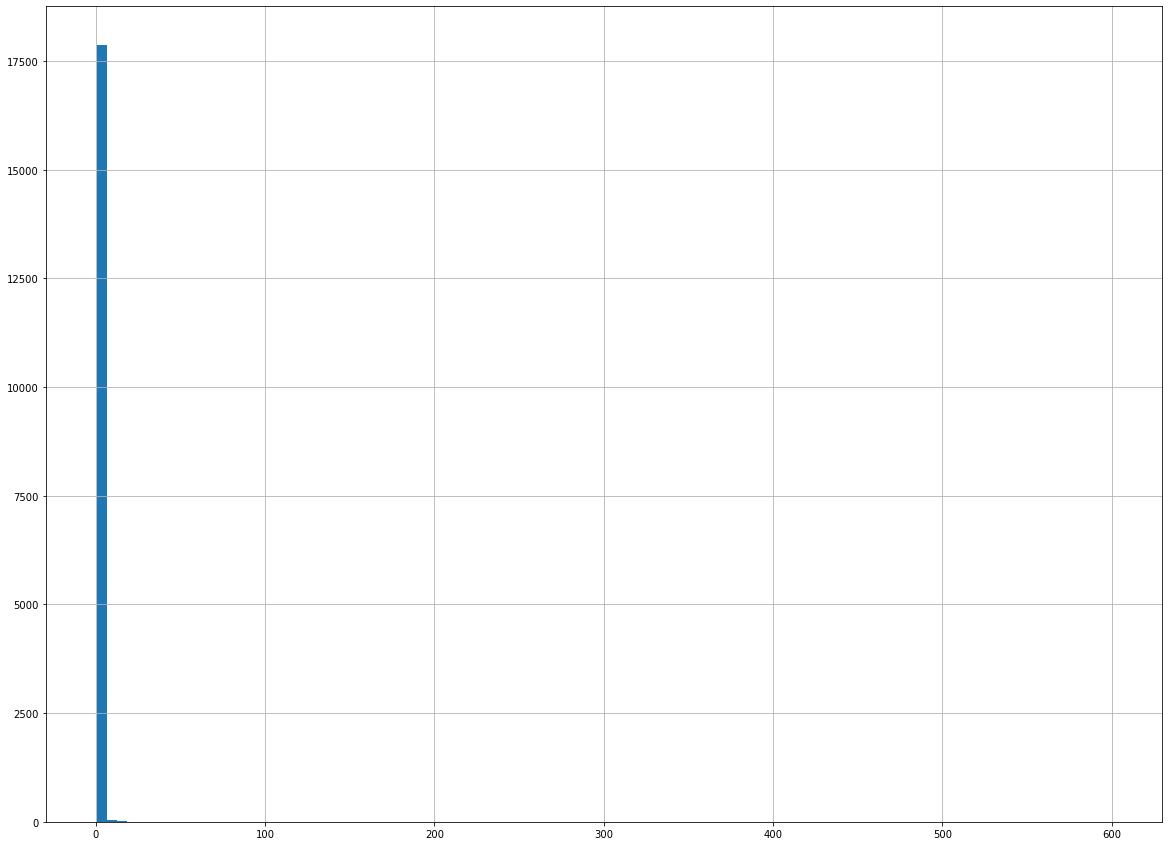

In [24]:
data['households'].hist(bins=100, figsize=(20,15))

#### 이상치 제거 후 histgram 확인

<AxesSubplot:>

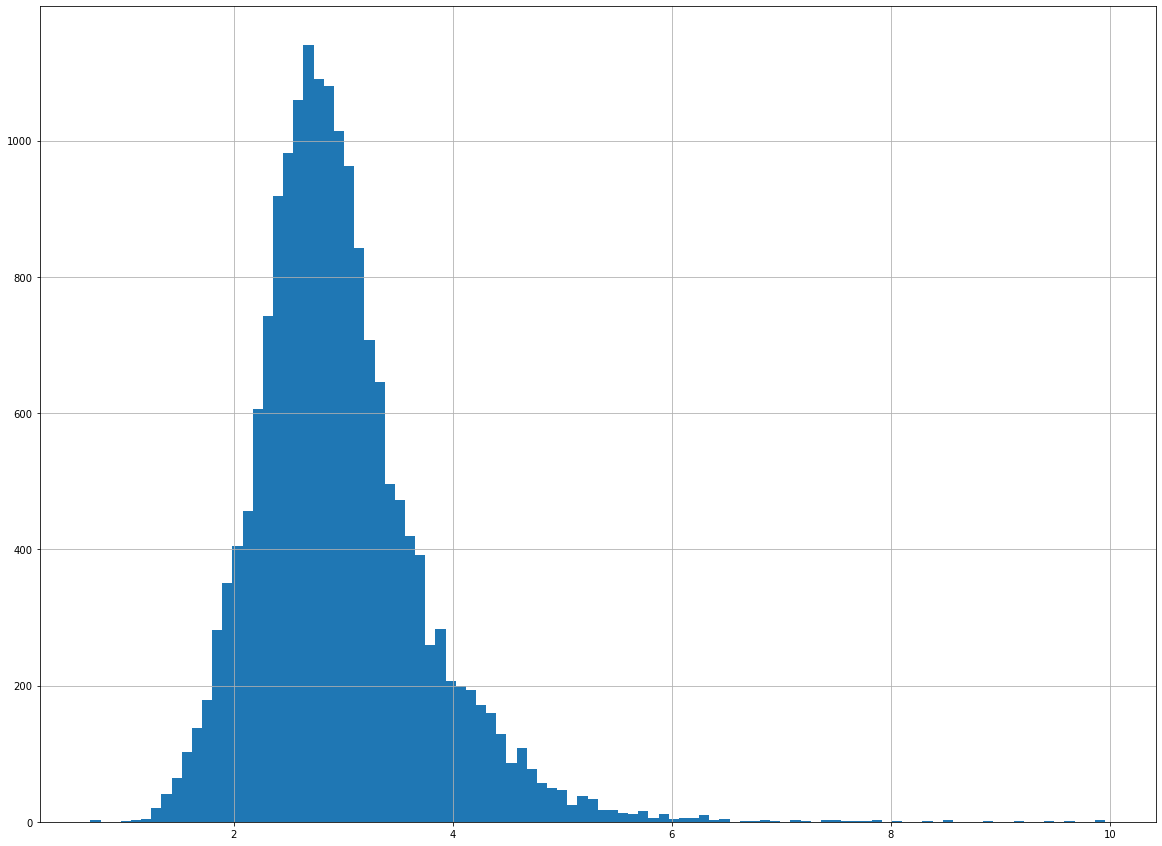

In [25]:
data_households=data[data['households']<10] #이상치 제거
data_households['households'].hist(bins=100, figsize=(20,15))


#### 이상치 집계

In [26]:
data_households2=data[data['households']>=10] # 이상치 만 따로 필터링하여 집계
print(data_households2['households'].value_counts())
data_households2


12.296089     1
11.634146     1
14.000000     1
63.750000     1
12.843750     1
18.500000     1
599.714286    1
19.312500     1
13.693487     1
16.937500     1
12.234043     1
16.048780     1
12.098940     1
51.400000     1
13.594828     1
10.153846     1
15.812155     1
18.444444     1
12.895397     1
10.980000     1
12.130081     1
33.952941     1
Name: households, dtype: int64


,housing_age,income,bedrooms,households,rooms,house_value
2420,20,1.0298,0.338658,13.693487,2.398467,300000
5398,33,3.8750,0.218310,12.234043,3.021277,225000
8003,36,4.2578,0.212528,33.952941,5.258824,183300
9617,26,5.7485,0.167702,51.400000,5.366667,162500
9625,36,4.6250,0.142857,14.000000,24.500000,162500
9703,8,1.6250,0.125000,63.750000,7.600000,162500
9713,19,0.9573,0.338843,16.048780,2.951220,162500
9716,16,0.5360,1.000000,18.444444,2.111111,162500
11397,13,3.4107,0.218182,12.843750,5.156250,142500
11987,41,3.5769,0.222672,18.500000,4.940000,135700


In [27]:
data_households2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22 entries, 2420 to 17864
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   housing_age  22 non-null     int64  
 1   income       22 non-null     float64
 2   bedrooms     22 non-null     float64
 3   households   22 non-null     float64
 4   rooms        22 non-null     float64
 5   house_value  22 non-null     int64  
dtypes: float64(4), int64(2)
memory usage: 1.2 KB


### rooms 변수 확인

<AxesSubplot:>

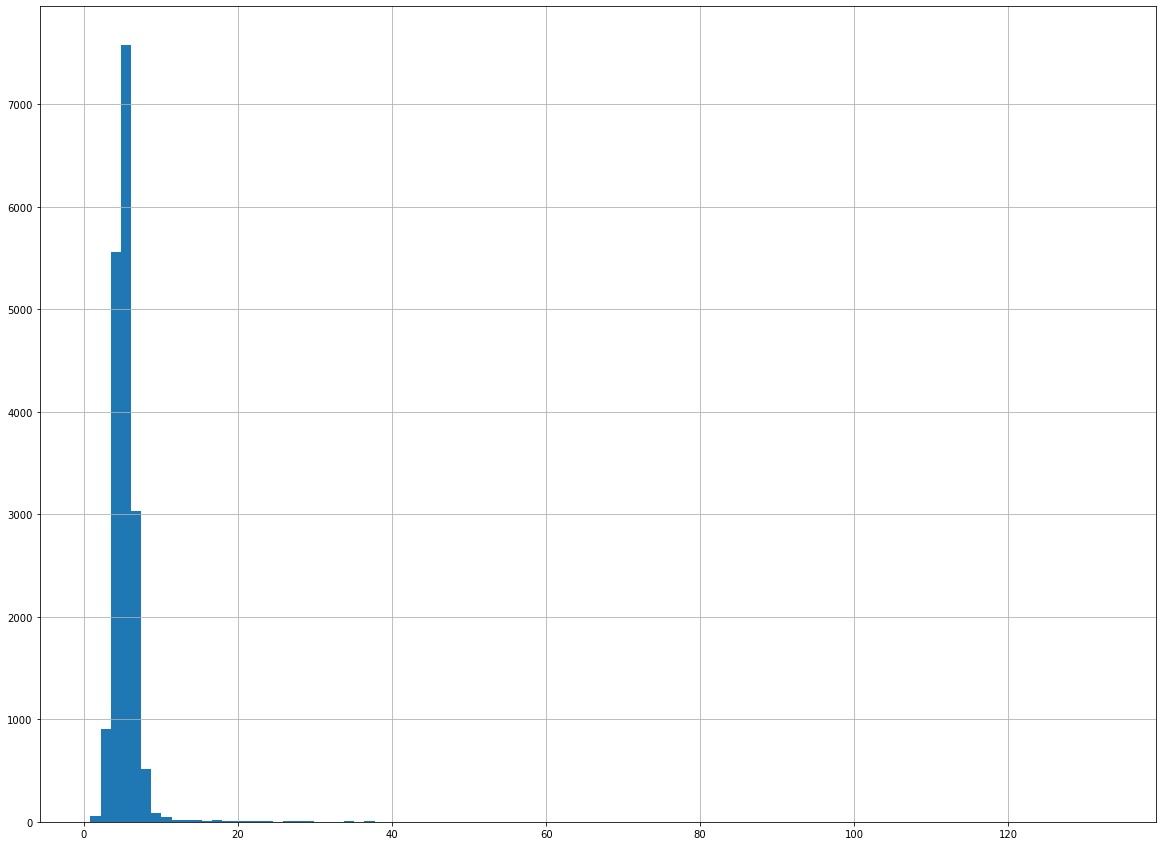

In [29]:
data['rooms'].hist(bins=100,figsize=(20,15))

#### 이상치 제거 후 histgram 확인

<AxesSubplot:>

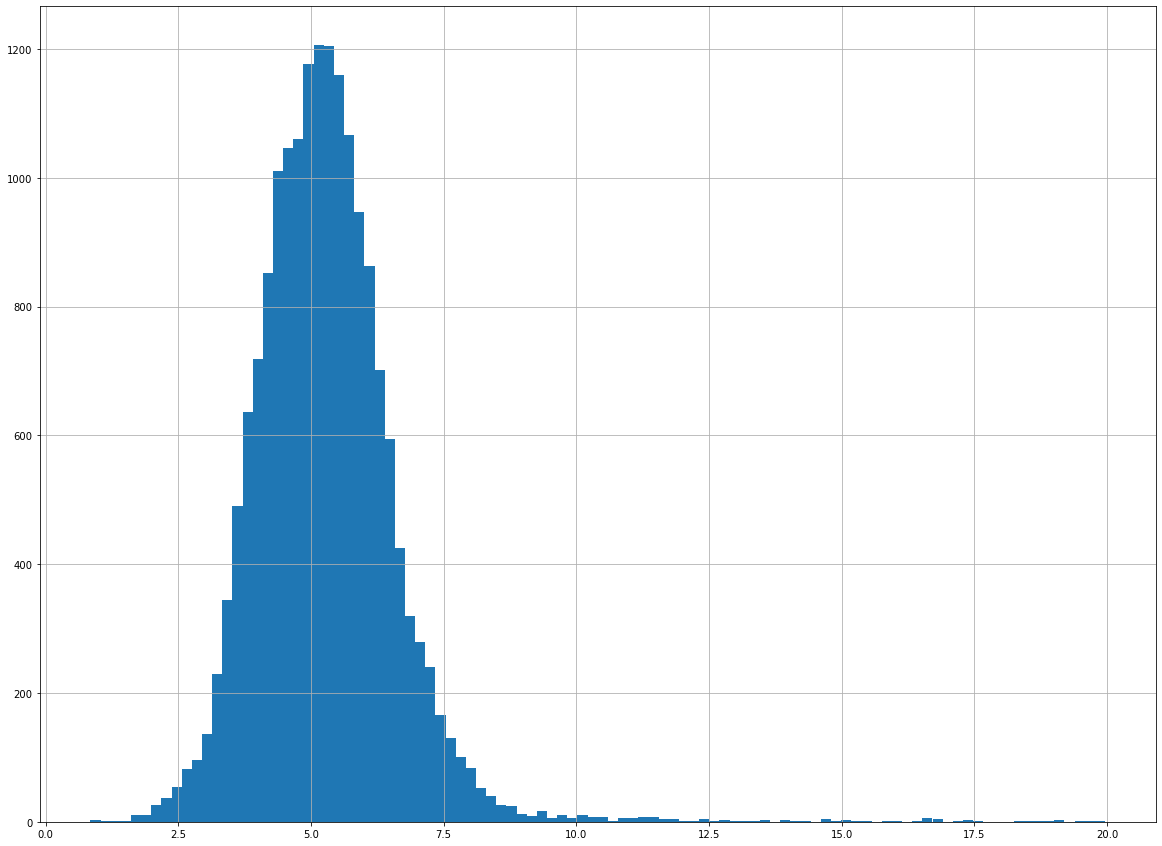

In [30]:
data_room=data[data['rooms']<20]
data_room['rooms'].hist(bins=100,figsize=(20,15))

In [31]:
data_room2=data[data['rooms']>=20]
print(data_room2['rooms'].value_counts())
data_room2

24.500000    2
36.715385    1
28.757282    1
21.372093    1
24.532895    1
            ..
31.777778    1
20.033333    1
21.631579    1
34.843750    1
61.812500    1
Name: rooms, Length: 63, dtype: int64


,housing_age,income,bedrooms,households,rooms,house_value
324,19,4.0714,0.177958,2.333333,61.812500,437500
457,17,2.1719,0.172918,2.581818,28.600000,420000
1140,18,5.5456,0.146182,2.273585,36.075472,360000
2146,17,3.9722,0.172642,2.608355,20.900783,313400
2858,14,4.1016,0.175109,2.136364,20.939394,283300
...,...,...,...,...,...,...
16222,11,3.1250,0.235332,2.484848,47.515152,77500
16429,16,0.4999,0.277372,1.368421,21.631579,73500
16584,10,3.1250,0.250564,2.285714,21.095238,71300
16844,25,2.6250,0.255741,1.750000,59.875000,67500


In [32]:
data_room2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64 entries, 324 to 16848
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   housing_age  64 non-null     int64  
 1   income       64 non-null     float64
 2   bedrooms     64 non-null     float64
 3   households   64 non-null     float64
 4   rooms        64 non-null     float64
 5   house_value  64 non-null     int64  
dtypes: float64(4), int64(2)
memory usage: 3.5 KB


## 정제된 Data set 생성

### 각 칼럼별로 이상치 제거한 dataset 생성

In [33]:
new_data=data[(data['bedrooms']<0.5) & (data['households']<7) & (data['rooms']<12)]

In [34]:
new_data.describe()

,housing_age,income,bedrooms,households,rooms,house_value
count,17689.000000,17689.000000,17689.000000,17689.000000,17689.000000,17689.000000
mean,27.378823,3.671141,0.213278,2.952117,5.244001,189043.439313
std,11.280230,1.525937,0.051167,0.731573,1.184922,95487.122628
min,1.000000,0.499900,0.100000,0.750000,1.640000,14999.000000
25%,18.000000,2.532900,0.177464,2.470270,4.426829,114400.000000
50%,28.000000,3.453900,0.204104,2.854962,5.190779,171100.000000
75%,36.000000,4.591800,0.240157,3.316092,5.953728,242700.000000
max,51.000000,9.905500,0.498127,6.954023,11.901869,500000.000000


### 전체 Data histgram 확인

array([[<AxesSubplot:title={'center':'housing_age'}>,
        <AxesSubplot:title={'center':'income'}>],
       [<AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'households'}>],
       [<AxesSubplot:title={'center':'rooms'}>,
        <AxesSubplot:title={'center':'house_value'}>]], dtype=object)

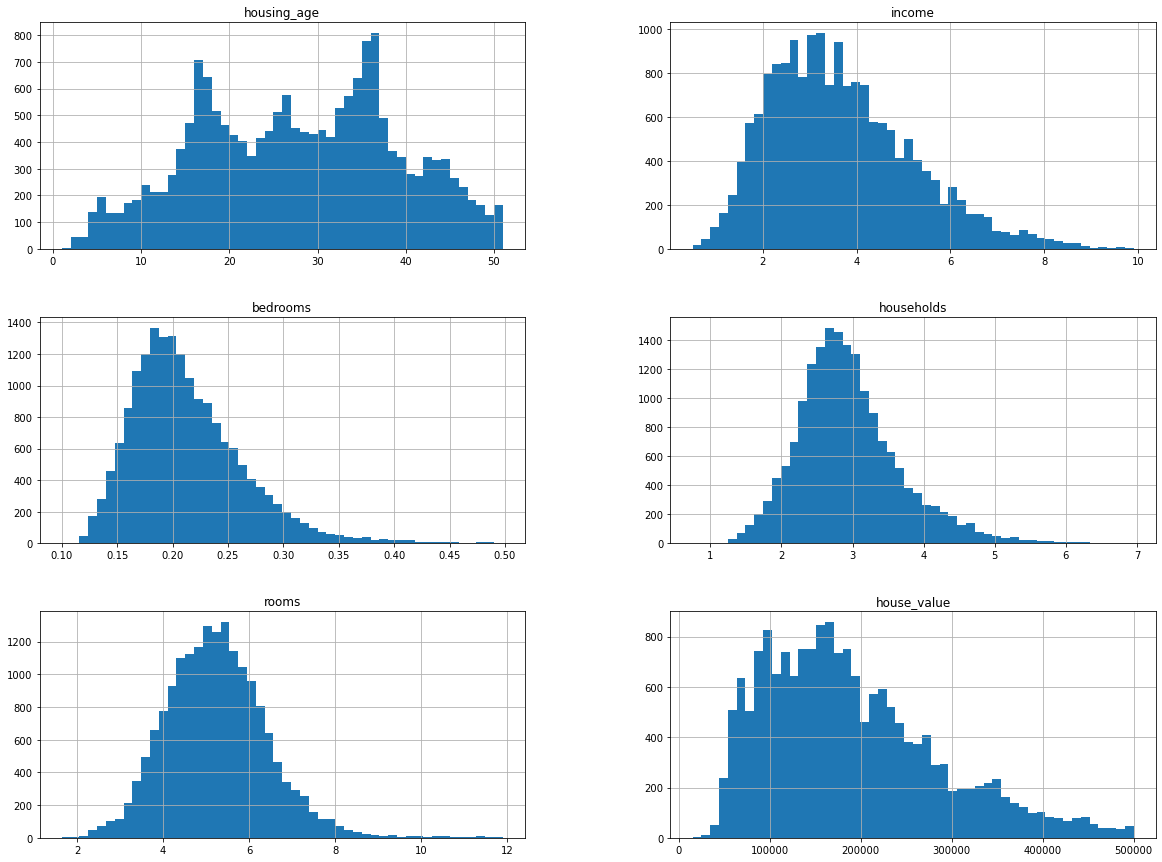

In [35]:
new_data.hist(bins=50, figsize=(20,15))

# Data csv로 저장하기

In [36]:
new_data.to_csv('house_price_실습.csv',index=False)